In [2]:
import time
from datetime import datetime

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, explained_variance_score
from sklearn.metrics import mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance, max_error

%matplotlib inline


In [15]:
df = pd.read_csv("data/1_data_test_XOM_Q5R_TAH_0.csv")
df = df.iloc[-100:, :]
print(len(df))
df.head(5)
df.to_csv('./data/1_data_test_XOM_Q5R_TAH_0_ex_1.csv')

100


In [16]:
def adjusted_r2(y_test, y_pred, n_features):
  adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (len(y_test) - n_features - 1))
  return adj_r2


print("MSE = " + str(mean_squared_error(df['target'], df['pred'])))
print("RMSE = " + str(mean_squared_error(df['target'], df['pred'], squared=False)))
print("MAPE = " + str(mean_absolute_percentage_error(df['target'], df['pred']) * 100))
print("R2 = " + str(r2_score(df['target'], df['pred'])))
print("adjust R2 = " + str(adjusted_r2(df['target'], df['pred'], 105)))
print("RMSLE = " + str(mean_squared_log_error(df['target'], df['pred'])))
print("explained_variance_score = " + str(explained_variance_score(df['target'], df['pred'])))
# print("mean_poisson_deviance = " + str(mean_poisson_deviance(df['target'], df['pred'])))
# print("mean_gamma_deviance = " + str(mean_gamma_deviance(df['target'], df['pred'])))
# print("mean_tweedie_deviance = " + str(mean_tweedie_deviance(df['target'], df['pred'])))
print("max_error = " + str(max_error(df['target'], df['pred'])))


print("\n")
print(df['right'].value_counts(normalize=True) * 100)
print(df['right'].value_counts())

MSE = 0.24226070156189983
RMSE = 0.4921998593680212
MAPE = 0.7157026325112894
R2 = 0.9571010330578309
adjust R2 = 1.7078329545457902
RMSLE = 6.913934956352532e-05
explained_variance_score = 0.9575710257440768
max_error = 1.1262115962256445


True     63.0
False    37.0
Name: right, dtype: float64
True     63
False    37
Name: right, dtype: int64


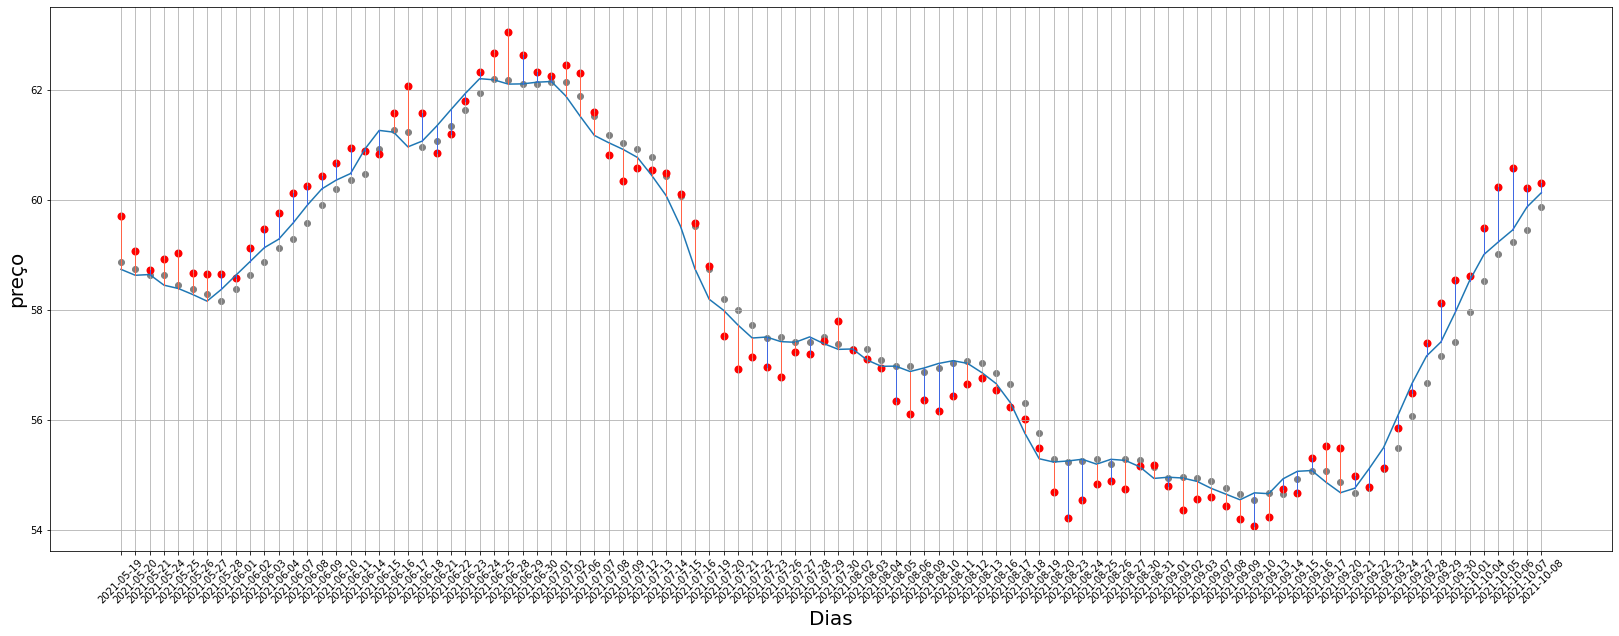

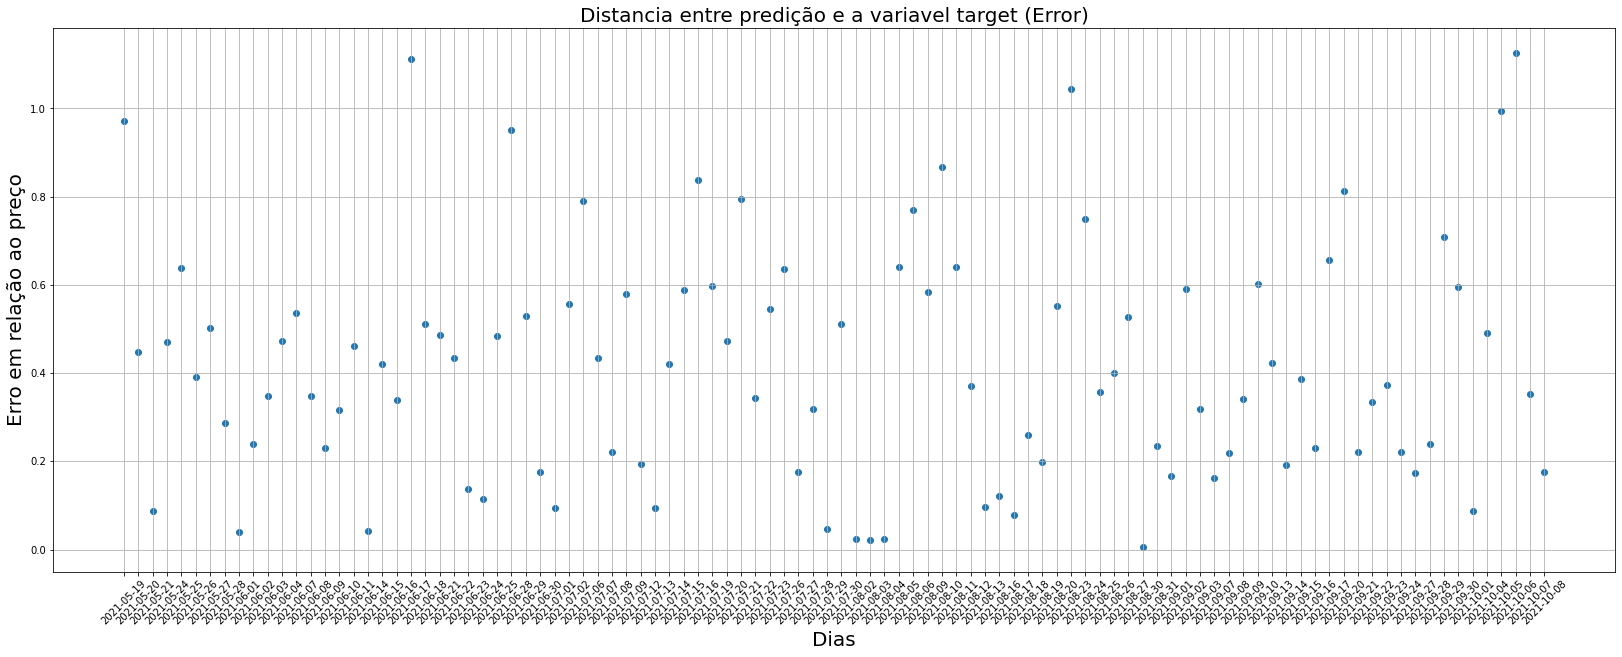

In [17]:
plt.figure(figsize=(28, 10))
plt.plot(df['Date'], df.target, label = "pred")
plt.scatter(df['Date'], df.trend_ema_fast, label = "pred", color='grey')
plt.scatter(df['Date'], df.pred, label = "pred", color='red', linewidth=2)
plt.grid(True)
plt.xticks(rotation=45) 

for i, val in df.iterrows():
    color = 'royalblue' if val[10] else 'tomato'
    plt.plot([val['Date'], val['Date']], [val['target'], val['pred']], label = "pred", linewidth=1, color=color)

plt.ylabel("preço", fontsize=20)
plt.xlabel("Dias", fontsize=20)
plt.grid(True)
plt.show()


plt.figure(figsize=(28, 10))
plt.scatter(df['Date'], df['error'], label = "error")
plt.grid(True)
plt.title("Distancia entre predição e a variavel target (Error)", fontsize=20)
plt.ylabel("Erro em relação ao preço", fontsize=20)
plt.xlabel("Dias", fontsize=20)
plt.xticks(rotation=45) 
plt.show()